In [1]:
# IMPORTS
import PyWGCNA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [ ]:
## Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')


## Load the dataset
geneExpression = working_dir + 'data/5xFAD_paper/expressionList.csv'
dataset = pd.read_csv(geneExpression)

## Make a subset to save RAM
subset_dataset_size = 1000
dataset = dataset.iloc[:, :subset_dataset_size] 
susbsetFile = working_dir + 'data/5xFAD_paper/expressionListSubset.csv' 
dataset.to_csv(susbsetFile, sep=',', index=False, encoding='utf-8') 

## Load the subset
geneExpressionsubset = working_dir + 'data/5xFAD_paper/expressionListSubset.csv'


In [2]:
### LOADING REAL UNPUBLISHED DATA    -     NO PUSHING FOR THE RESULTS

## Move out of the notebook folder to access datasets
working_dir = os.getcwd()
working_dir = working_dir.strip('notebooks')

# Prepare all the files for loading
data_dir = working_dir + 'data/PROTECTED_DATA/BGI_Expression_Data/'
mrna_count = data_dir + 'CRC.SW.mRNA.symbol.count.csv'
sample_info_selection = data_dir + 'Sample_Info_Selection.csv'

In [ ]:
pd.read_csv(sample_info_selection)

In [3]:
figures_dir = working_dir + 'results/WGCNA_'  # weird folder formatting, needs to be like this.

## Initialize the WGCNA with the dataset
pyWGCNA_model = PyWGCNA.WGCNA(name='5xFAD',
                              species='mus musculus',
                              geneExpPath=mrna_count,
                              outputPath=figures_dir,
                              save=True,
                              networkType="unsigned",
                              powers = None)


Saving data to be True, checking requirements ...


Pre-processing...
	Detecting genes and samples with too many missing values...


	Done pre-processing..



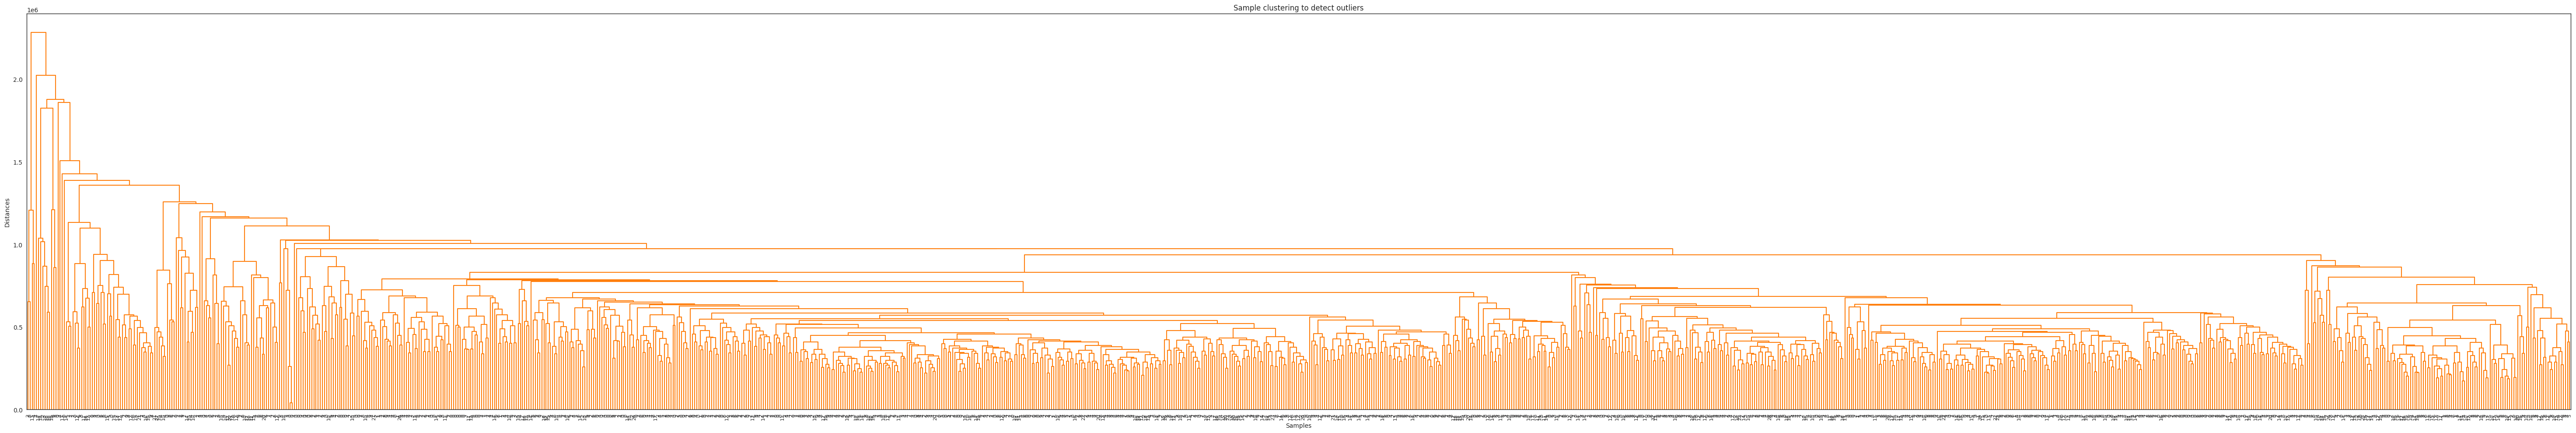

In [4]:
pyWGCNA_model.preprocess(show = True)

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2306
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.144374 -0.562091       0.390952  2624.801249  2658.117315   
1       2  0.447339 -1.483618       0.737644   745.402445   630.151078   
2       3  0.572833 -1.938317       0.884666   289.090426   193.311471   
3       4  0.642283 -2.225651        0.94737   132.057822     70.43855   
4       5  0.696065  -2.33853       0.970594    66.918437    28.670188   
5       6  0.719715 -2.432255       0.972916    36.549851    12.377726   
6       7  0.750068 -2.465696       0.977687    21.181436      5.75071   
7       8  0.766407 -2.456417       0.974551    12.901674     2.810326   
8       9  0.771218 -2.427543        0.96532     8.208948     1.455708   
9      10  0.757733 -2.340619       0.951019     5.432705     0.790391   
10     11  0.801426 -2.045406       0.975201     3.727592     0.436435   
11     13

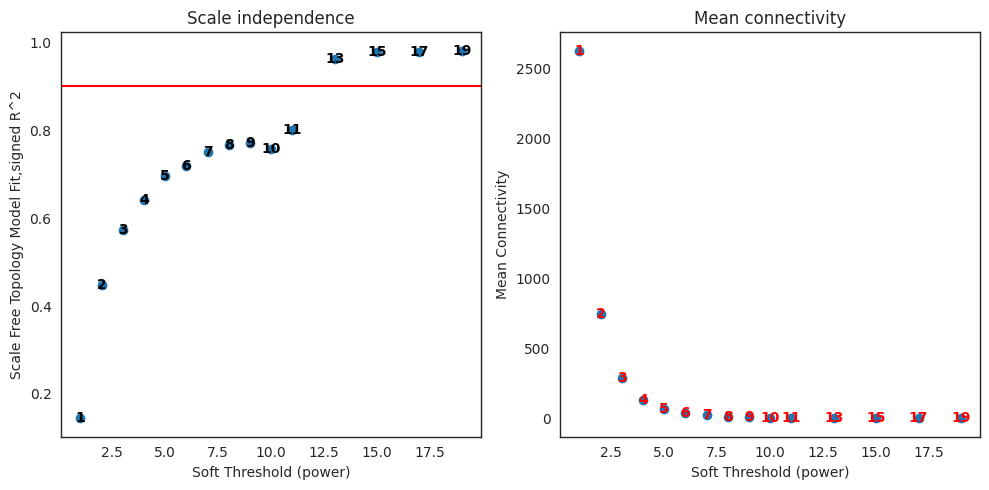

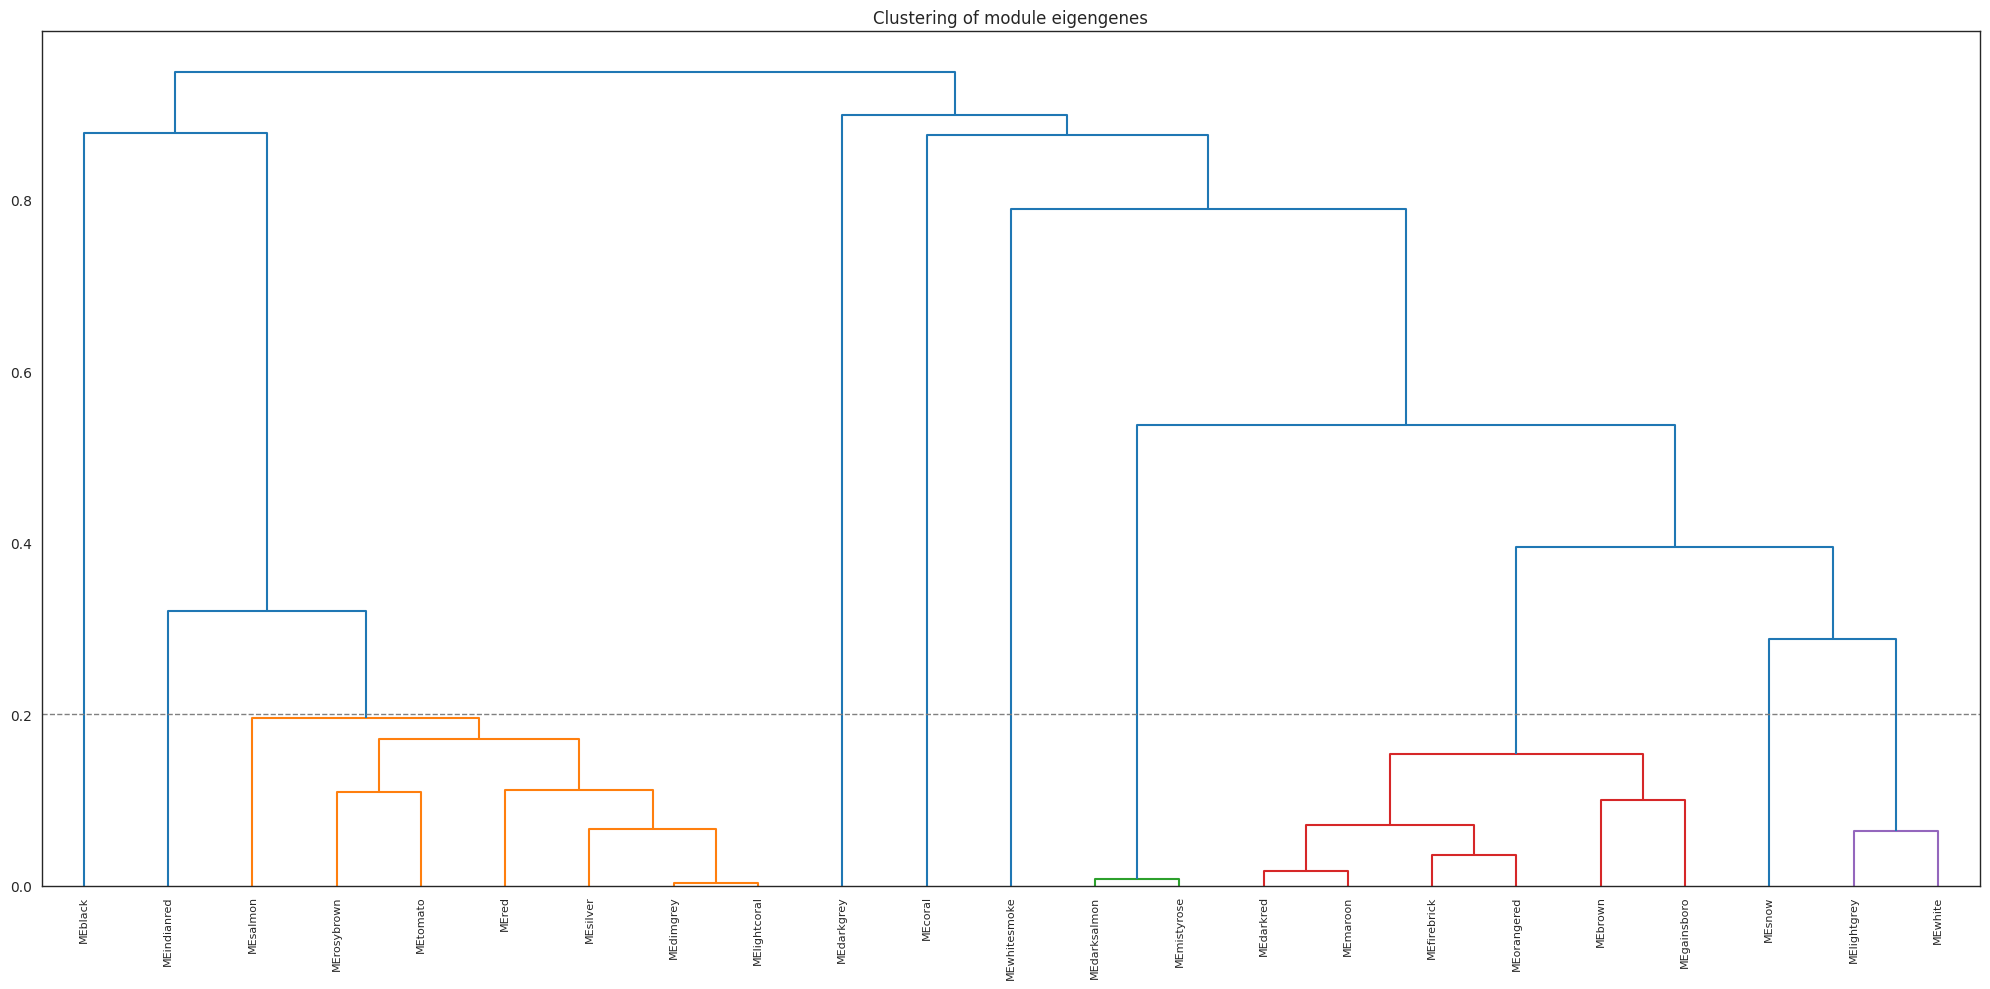

In [5]:
pyWGCNA_model.findModules()
# pyWGCNA_5xFAD.findModules(blockSize=1500, moreNetworkConcepts = True) # For some reason these don't work. Make the powerVector crash or block size goes into wrong functions

In [10]:
pyWGCNA_model.updateSampleInfo(path=sample_info_selection, sep=',')

# add color for metadata
pyWGCNA_model.setMetadataColor('Gender', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_model.setMetadataColor('Primary Site Disease', {'Rectum': 'darkviolet',
                                                        'Colon': 'deeppink'})
pyWGCNA_model.setMetadataColor('Histology Subtype', {'Adenocarcinoma': 'thistle',
                                                    'Mucinous Adenocarcinoma': 'plum'})
pyWGCNA_model.setMetadataColor('Tissue', {'Stage IV': 'red',
                                          'Stage III': 'orange',
                                          'Stage II': 'yellow',
                                          'Stage I': 'green'})

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [ ]:
# Automatic dataset builder from biomart.
'''
geneList = PyWGCNA.getGeneList(dataset='mmusculus_gene_ensembl',
                               attributes=['ensembl_gene_id',
                                           'external_gene_name',
                                           'gene_biotype'],
                               maps=['gene_id', 'gene_name', 'gene_biotype'],
                               server_domain="http://ensembl.org/biomart")
'''

# We already have the file, so we just load it from the file
gene_list_path = working_dir + 'data/5xFAD_paper/geneList'
pyWGCNA_5xFAD.updateGeneInfo(path=gene_list_path, sep = ' ')


Some visualizations

In [ ]:
pyWGCNA_model.datExpr

#pyWGCNA_5xFAD.datExpr.obs.head(5)

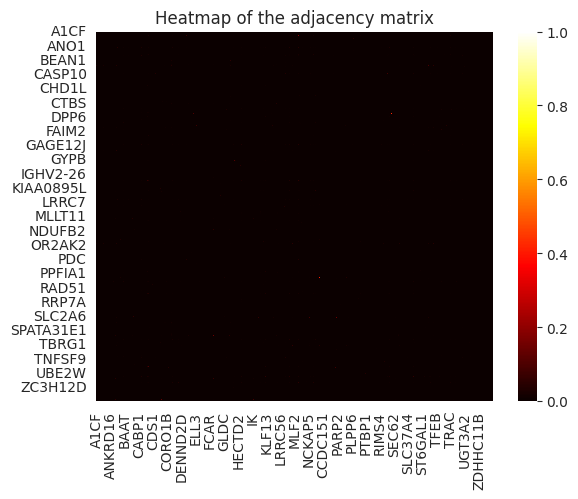

In [8]:
# Plotting the adjacency matrix as heatmap
plt.figure()
sns.heatmap(pyWGCNA_model.adjacency, cmap='hot')
plt.title("Heatmap of the adjacency matrix")
plt.savefig(working_dir + 'results/WGCNA_figures/' + "Heatmap of the adjacency matrix", dpi=1000)
plt.show()


In [ ]:
pyWGCNA_model.analyseWGCNA()

In [ ]:
pyWGCNA_model.top_n_hub_genes(moduleName="silver", n=50)
